## Import Library

In [76]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In [2]:
im_shape = (250,250)

TRAINING_DIR = '../input/ds_frutas_am/train'
TEST_DIR = '../input/ds_frutas_am/test'

seed = 10

BATCH_SIZE = 16

In [3]:

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:

# data_generator = ImageDataGenerator(
#         validation_split=0.2,
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

In [4]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


### Showing some examples

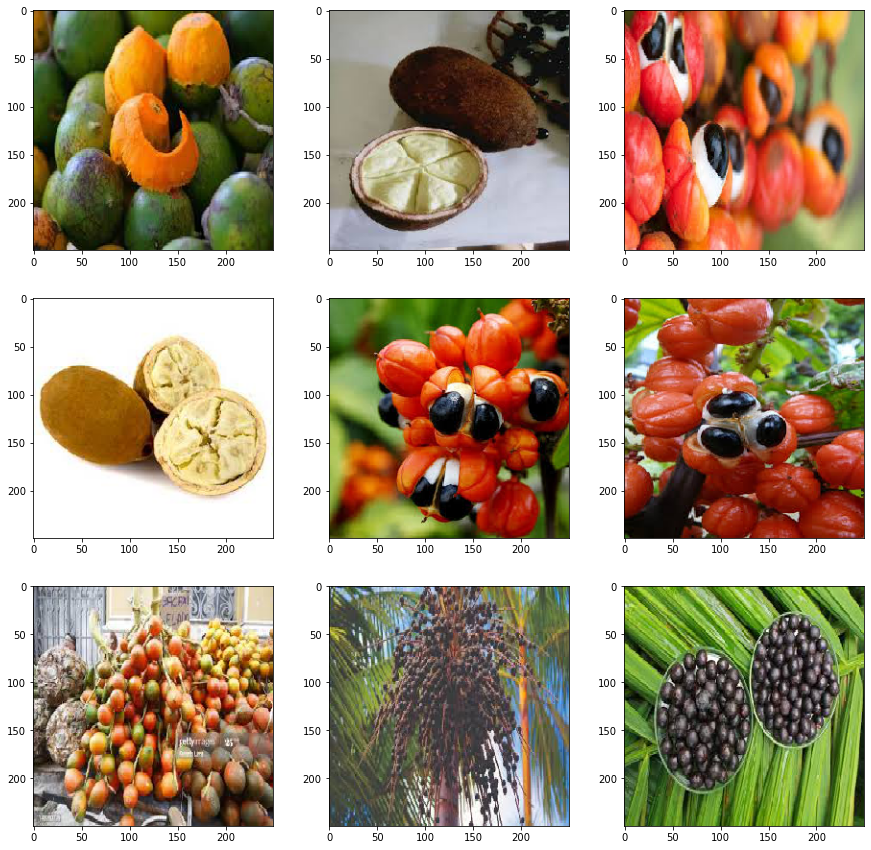

In [5]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## Building CNN Model

(250, 250, 3)

In [92]:
model = Sequential()

# Lớp tích chập đầu tiên, xác định input (im_shape[0], im_shape[1], 3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(im_shape[0], im_shape[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ hai
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ ba
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ tư
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# # Có thể xây thêm các Lớp tích chập khác ... 
# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(AveragePooling2D(pool_size=(2, 2)))

# Lớp Flatten để chuyển từ tensor 3D sang vector 1D
model.add(Flatten())

# Lớp fully connected đầu tiên
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Để tránh overfitting

# Lớp fully connected thứ hai
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))   

# Lớp output, số lượng lớp tùy thuộc vào số lượng classes cần phân loại
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Training

In [93]:
epochs = 50

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]
'''
EarlyStopping Callback:
monitor='val_loss': tham số mà callback sẽ theo dõi, giống như ModelCheckpoint.
patience=10: nếu không có cải thiện trong val_loss trong 10 epoch liên tiếp, huấn luyện sẽ dừng.
verbose=1: Thông báo chi tiết về quá trình dừng huấn luyện.
'''

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE, #75//16
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE
)

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 1.9148 - accuracy: 0.2031
Epoch 00001: val_loss improved from inf to 1.77014, saving model to model.h5
4/4 [==============================] - 1s 290ms/step - loss: 1.9148 - accuracy: 0.2031 - val_loss: 1.7701 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 1.7305 - accuracy: 0.2143
Epoch 00002: val_loss improved from 1.77014 to 1.58571, saving model to model.h5
4/4 [==============================] - 1s 253ms/step - loss: 1.7305 - accuracy: 0.2143 - val_loss: 1.5857 - val_accuracy: 0.1875
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 1.6156 - accuracy: 0.3214
Epoch 00003: val_loss improved from 1.58571 to 1.47053, saving model to model.h5
4/4 [==============================] - 1s 255ms/step - loss: 1.6156 - accuracy: 0.3214 - val_loss: 1.4705 - val_accuracy: 0.1250
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 1.4159 - accuracy: 0.3036
Epoch 

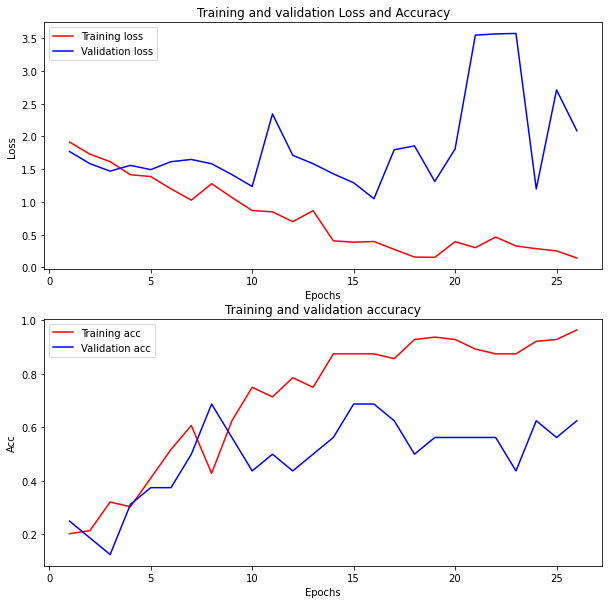

In [94]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'r', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'r', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluating the model

In [95]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [96]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.9415453672409058
Val accuracy: 0.7222222089767456


In [97]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1481170654296875
Test accuracy: 0.6000000238418579


In [98]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Classification Report
              precision    recall  f1-score   support

        acai       1.00      0.80      0.89         5
     cupuacu       0.25      0.20      0.22         5
    graviola       0.50      1.00      0.67         5
     guarana       0.56      1.00      0.71         5
     pupunha       1.00      0.20      0.33         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.60        30
   macro avg       0.72      0.60      0.57        30
weighted avg       0.72      0.60      0.57        30



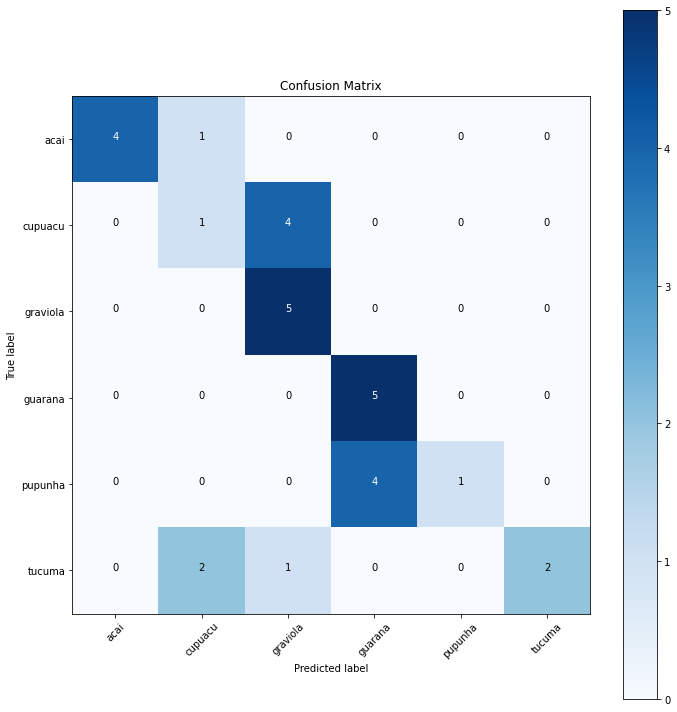

In [99]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))